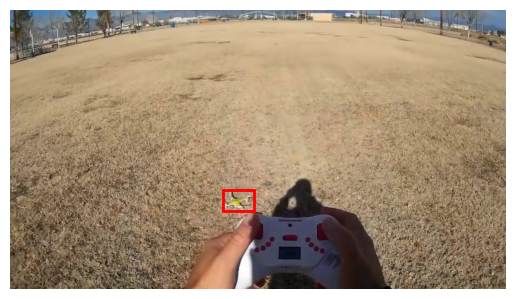

In [2]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Path to the image and text file
image_path = '/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/images/train/lasot-00000001.jpg'
bbox_path = '/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/labels/train/lasot-00000001.txt'

# Read the image
image = cv2.imread(image_path)
# Convert BGR (OpenCV format) to RGB (Matplotlib format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get the image dimensions
height, width, _ = image.shape

# Read the bounding box coordinates from the text file
with open(bbox_path, 'r') as file:
    bbox = file.readline().strip().split()
    dr_id, x_center_norm, y_center_norm, w_norm, h_norm = map(float, bbox)  # Assuming the format is x_center y_center width height

# Convert normalized coordinates to pixel values
x_center = int(x_center_norm * width)
y_center = int(y_center_norm * height)
w = int(w_norm * width)
h = int(h_norm * height)

# Calculate the top-left corner of the bounding box
x = int(x_center - w / 2)
y = int(y_center - h / 2)

fig, ax = plt.subplots(1)
ax.imshow(image)
ax.axis('off')

# Create a Rectangle patch
rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

# Show the plot
plt.show()


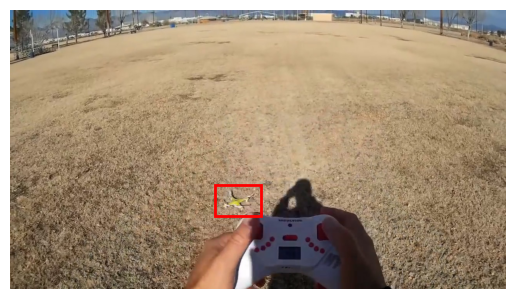

In [3]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Path to the image and text file
image_path = '/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/images/train/lasot-00000001.jpg'
bbox_path = '/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/labels/train/lasot-00000001.txt'

# Read the image
image = cv2.imread(image_path)
# Convert BGR (OpenCV format) to RGB (Matplotlib format)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get the image dimensions
height, width, _ = image.shape

# Read the bounding box coordinates from the text file
with open(bbox_path, 'r') as file:
    bbox = file.readline().strip().split()
    dr_id, x_center_norm, y_center_norm, w_norm, h_norm = map(float, bbox)  # Assuming the format is x_center y_center width height

# Convert normalized coordinates to pixel values
x_center = int(x_center_norm * width)
y_center = int(y_center_norm * height)
w = int(w_norm * width)
h = int(h_norm * height)

# Calculate the top-left corner of the original bounding box
x = int(x_center - w / 2)
y = int(y_center - h / 2)

# Increase the width and height by a quarter of their values
x_min = int(x - (w / 4))
y_min = int(y - (h / 4))
x_max = int(x + w + (w / 4))
y_max = int(y + h + (h / 4))

# Ensure the coordinates are within the image bounds
x_min = max(0, x_min)
y_min = max(0, y_min)
x_max = min(width, x_max)
y_max = min(height, y_max)

# Create a figure and axis
fig, ax = plt.subplots(1)
ax.imshow(image)
ax.axis('off')

# Create a Rectangle patch
rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

# Show the plot
plt.show()


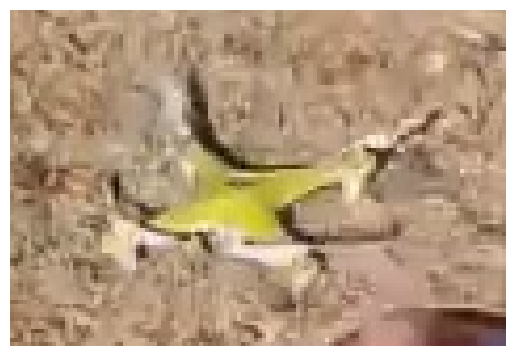

In [4]:
cropped_image = image[y_min:y_max, x_min:x_max]

plt.imshow(cropped_image)
plt.axis('off')  # Hide axes
plt.show()

In [7]:
import os
import cv2
import matplotlib.pyplot as plt
import logging

# Paths to the directories
image_dir = '/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/images/val'
bbox_dir = '/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/labels/val'
output_dir = '/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/cropped/val'
log_file = '/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/processing_log.txt'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Set up logging
logging.basicConfig(filename=log_file, level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logging.info('Processing started.')

# Get the list of image files
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png') or f.endswith('.jpg')]

for image_file in image_files:
    try:
        # Construct the full path to the image and corresponding bbox file
        image_path = os.path.join(image_dir, image_file)
        bbox_path = os.path.join(bbox_dir, os.path.splitext(image_file)[0] + '.txt')

        # Read the image
        image = cv2.imread(image_path)
        if image is None:
            logging.warning(f"Could not read image {image_file}. Skipping.")
            continue

        # Convert BGR (OpenCV format) to RGB (Matplotlib format)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Get the image dimensions
        height, width, _ = image.shape

        # Read the bounding box coordinates from the text file
        if not os.path.exists(bbox_path):
            logging.warning(f"Bbox file for {image_file} not found. Skipping.")
            continue

        with open(bbox_path, 'r') as file:
            bbox = file.readline().strip().split()
            if len(bbox) != 5:
                logging.warning(f"Invalid bbox file for {image_file}. Skipping.")
                continue
            dr_id, x_center_norm, y_center_norm, w_norm, h_norm = map(float, bbox)  # Assuming the format is x_center y_center width height

        # Convert normalized coordinates to pixel values
        x_center = int(x_center_norm * width)
        y_center = int(y_center_norm * height)
        w = int(w_norm * width)
        h = int(h_norm * height)

        # Calculate the top-left corner of the original bounding box
        x = int(x_center - w / 2)
        y = int(y_center - h / 2)

        # Increase the width and height by a quarter of their values
        x_min = int(x - (w / 4))
        y_min = int(y - (h / 4))
        x_max = int(x + w + (w / 4))
        y_max = int(y + h + (h / 4))

        # Ensure the coordinates are within the image bounds
        x_min = max(0, x_min)
        y_min = max(0, y_min)
        x_max = min(width, x_max)
        y_max = min(height, y_max)

        # Crop the image using the extended coordinates
        cropped_image = image[y_min:y_max, x_min:x_max]

        # Check if the cropped image is valid
        if cropped_image.size == 0:
            logging.warning(f"Invalid crop for {image_file}. Skipping.")
            continue

        # Convert the cropped image back to BGR for saving
        cropped_image_bgr = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR)

        # Save the cropped image
        output_path = os.path.join(output_dir, image_file)
        cv2.imwrite(output_path, cropped_image_bgr)
        # logging.info(f"Successfully processed {image_file}.")

    except Exception as e:
        logging.error(f"Error processing {image_file}: {str(e)}")

logging.info('Processing completed.')


In [8]:
import os

# Define the directory path you want to enter
directory_path = "/mnt/DATA/dronetracking/Abhin/U-2-Net"

# Use the os.chdir() function to change the current working directory
os.chdir(directory_path)
current_directory = os.getcwd()
print("Current Directory:", current_directory)


Current Directory: /mnt/DATA/dronetracking/Abhin/U-2-Net


In [9]:
!python /mnt/DATA/dronetracking/Abhin/U-2-Net/u2net_test.py

['/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/cropped/train/lasot-00001358.jpg']
...load U2NET---173.6 MB
Inferencing: lasot-00001358.jpg
/home/ee22m215/anaconda3/envs/segdrone/lib/python3.8/site-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/ee22m215/anaconda3/envs/segdrone/lib/python3.8/site-packages/torch/nn/functional.py:2970: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
/home/ee22m215/anaconda3/envs/segdrone/lib/python3.8/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid ins

In [10]:
!python /mnt/DATA/dronetracking/Abhin/U-2-Net/u2net_test.py

['/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/cropped/val/lasot-00000178.jpg']
...load U2NET---173.6 MB
Inferencing: lasot-00000178.jpg
/home/ee22m215/anaconda3/envs/segdrone/lib/python3.8/site-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/ee22m215/anaconda3/envs/segdrone/lib/python3.8/site-packages/torch/nn/functional.py:2970: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
/home/ee22m215/anaconda3/envs/segdrone/lib/python3.8/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid inste

In [14]:
import os
import numpy as np
from PIL import Image
import logging

def create_original_sized_mask(cropped_mask, original_image_path, extended_coords, output_path):
    # Open the original image to get its dimensions
    original_image = Image.open(original_image_path)
    original_width, original_height = original_image.size

    # Create a full zero mask with the original image dimensions
    original_mask = Image.new('L', (original_width, original_height), 0)  # 'L' mode for single channel (grayscale)

    # Ensure the cropped mask is single-channel
    if cropped_mask.mode != 'L':
        cropped_mask = cropped_mask.convert('L')

    # Convert images to numpy arrays
    cropped_mask_array = np.array(cropped_mask)
    original_mask_array = np.array(original_mask)

    y_min, y_max, x_min, x_max = extended_coords

    # Ensure the mask is placed within the bounds of the original mask
    original_mask_array[y_min:y_max, x_min:x_max] = cropped_mask_array

    # Convert the array back to an image
    original_mask = Image.fromarray(original_mask_array)

    # Save the mask
    original_mask.save(output_path)

def get_extended_coordinates(annotation_path, image_width, image_height):
    try:
        # Read the bounding box coordinates from the text file
        if not os.path.exists(annotation_path):
            logging.warning(f"Bbox file for {annotation_path} not found. Skipping.")
            return None

        with open(annotation_path, 'r') as file:
            bbox = file.readline().strip().split()
            if len(bbox) != 5:
                logging.warning(f"Invalid bbox file for {annotation_path}. Skipping.")
                return None

            dr_id, x_center_norm, y_center_norm, w_norm, h_norm = map(float, bbox)  # Assuming the format is x_center y_center width height

        # Convert normalized coordinates to pixel values
        x_center = int(x_center_norm * image_width)
        y_center = int(y_center_norm * image_height)
        w = int(w_norm * image_width)
        h = int(h_norm * image_height)

        # Calculate the top-left corner of the original bounding box
        x = int(x_center - w / 2)
        y = int(y_center - h / 2)

        # Increase the width and height by a quarter of their values
        x_min = int(x - (w / 4))
        y_min = int(y - (h / 4))
        x_max = int(x + w + (w / 4))
        y_max = int(y + h + (h / 4))

        # Ensure the coordinates are within the image bounds
        x_min = max(0, x_min)
        y_min = max(0, y_min)
        x_max = min(image_width, x_max)
        y_max = min(image_height, y_max)

        return y_min, y_max, x_min, x_max

    except Exception as e:
        # Handle exceptions gracefully
        logging.error(f"Error processing {annotation_path}: {str(e)}")
        return None

def process_images(image_dir, annotation_dir, cropped_mask_dir, output_dir):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Get sorted list of files in annotation directory
    annotation_files = sorted(os.listdir(annotation_dir))

    # Process each annotation file
    for annotation_filename in annotation_files:
        if annotation_filename.endswith('.txt'):
            base_name = annotation_filename[:-4]
            image_path = os.path.join(image_dir, base_name + '.jpg')
            cropped_mask_path = os.path.join(cropped_mask_dir, 'croped_mask' + base_name + '.png')  # Adjusted mask filename

            print(f"Processing: {annotation_filename}")
            print(f"Expected image path: {image_path}")
            print(f"Expected mask path: {cropped_mask_path}")

            if not os.path.exists(image_path) or not os.path.exists(cropped_mask_path):
                print(f"Missing corresponding image or mask for {annotation_filename}")
                continue

            # Open the original image to get its dimensions
            original_image = Image.open(image_path)
            original_width, original_height = original_image.size

            # Get the extended coordinates
            extended_coords = get_extended_coordinates(os.path.join(annotation_dir, annotation_filename), original_width, original_height)

            if extended_coords:
                # Load the cropped mask
                cropped_mask = Image.open(cropped_mask_path)

                # Create and save the original-sized mask
                output_path = os.path.join(output_dir, base_name + '_original_size_mask.png')
                create_original_sized_mask(cropped_mask, image_path, extended_coords, output_path)
                print(f"Original-sized mask saved: {output_path}")

# Sample data directories
image_dir = '/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/images/val'
annotation_dir = '/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/labels/val'
cropped_mask_dir = '/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/cropped_mask/val'
output_dir = '/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/original_sized_mask/val'

# Process the images
process_images(image_dir, annotation_dir, cropped_mask_dir, output_dir)


Processing: lasot-00000178.txt
Expected image path: /mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/images/val/lasot-00000178.jpg
Expected mask path: /mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/cropped_mask/val/croped_masklasot-00000178.png
Original-sized mask saved: /mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/original_sized_mask/val/lasot-00000178_original_size_mask.png
Processing: lasot-00000286.txt
Expected image path: /mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/images/val/lasot-00000286.jpg
Expected mask path: /mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/cropped_mask/val/croped_masklasot-00000286.png
Original-sized mask saved: /mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/original_sized_mask/val/lasot-00000286_original_size_mask.png
Processing: lasot-00000508.txt
Expected image path: /mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/ima

In [17]:
import os
import numpy as np
import cv2
from shapely.geometry import Polygon

def mask_to_polygons(mask):
    '''
    Convierte una máscara de imagen en polígonos. Devuelve una lista de polígonos de shapely.
    
    Args:
        mask (numpy array): Máscara en escala de grises.
    '''
    
    # Calcula los contornos 
    mask = mask.astype(bool)
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Convertimos los contornos a polígonos de shapely
    polygons = []
    normalized_polygons = []
    for contour in contours:
        try:
            polygon = contour.reshape(-1, 2).tolist()
            normalized_polygon = [[round(coord[0] / mask.shape[1] , 4), round(coord[1] / mask.shape[0] , 4)] for coord in polygon]
        
            # Convertimos a objeto polígono de shapely
            polygon_shapely = Polygon(polygon)
            simplified_polygon = polygon_shapely.simplify(0.85, preserve_topology=True)
            polygons.append(simplified_polygon)

            normalized_polygons.append(Polygon(normalized_polygon))
        except Exception as e:
            pass

    return normalized_polygons

def process_masks_in_folder(mask_folder, output_folder):
    '''
    Procesa todas las máscaras en una carpeta y crea un archivo de texto para cada imagen con los polígonos.
    
    Args:
        mask_folder (str): Ruta a la carpeta de máscaras.
        output_folder (str): Ruta a la carpeta donde se guardarán los archivos de texto.
    '''
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for mask_filename in os.listdir(mask_folder):
        if not mask_filename.endswith('.png'):
            continue

        mask_path = os.path.join(mask_folder, mask_filename)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        polygons = mask_to_polygons(mask)
        
        # Assuming the output filename should follow the pattern without the '_original_size_mask' suffix
        output_filename = mask_filename.replace('_original_size_mask', '').replace('.png', '.txt')
        output_path = os.path.join(output_folder, output_filename)
        
        with open(output_path, 'w') as f:
            for poly in polygons:
                f.write('0 ' + ' '.join(f"{(coord[0])} {(coord[1])}" for coord in poly.exterior.coords[:-1]) + '\n')

# Rutas a las carpetas
mask_folder = '/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/original_sized_mask/train'
output_folder = '/mnt/DATA/dronetracking/Abhin/segement_detect/lasot-clustered-data/polygons/train'

process_masks_in_folder(mask_folder, output_folder)
